# Regresión Lineal: Costo de un incidente de seguridad
En este ejercicio se explican los funamentos básicos de la regresión lineal aplicada a un caso de uso sencillo relacionada con la Ciberseguridad.

## Enunciado del ejercicio
El ejercicio consiste en predecir el costo de un insidente de seguridad en base al número de equipos que se han visto afectado. El lconjunto de datos es aleatoría.

# 1.- Generación del DataSet.

In [1]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

print("La longitud del DataSet es: ", len(X))

La longitud del DataSet es:  100


# 2.- Visualización del conjunto del DataSet.

In [2]:
import matplotlib. pyplot as plt

%matplotlib inline

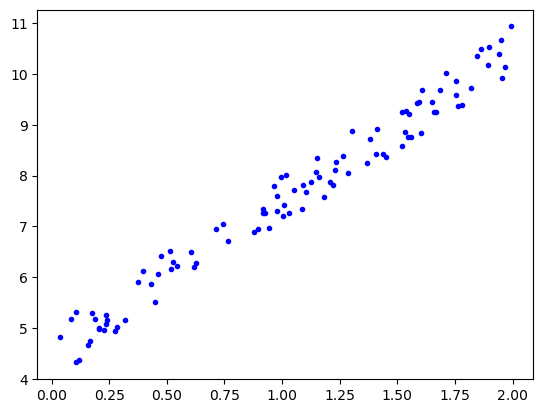

In [3]:
plt.plot(X, y, 'b.')
plt.show()

In [4]:
plt.plot(X, y, "b.")
plt.xlabel("Equipos afectados (u/1000)")
plt.ylabel("Costo del Incidente (u/1000)")

Text(0, 0.5, 'Costo del Incidente (u/1000)')

# 3.- MOdificación del DataSet

In [5]:
import pandas as pd

data = {
    'No_Equipos_Afectados': X.flatten(),
    'Costo': y.flatten()
}
df = pd.DataFrame(data)
df.head(10)

,No_Equipos_Afectados,Costo
0,1.383067,8.712106
1,1.781251,9.388724
2,0.318315,5.155008
3,0.205087,4.990609
4,1.407626,8.429108
5,1.533606,8.857969
6,1.559837,8.751626
7,1.145681,8.071269
8,0.430394,5.868599
9,1.369274,8.239392


In [6]:
# Escalado del Número de equipos afectados
df['No_Equipos_Afectados'] = df['No_Equipos_Afectados'] * 1000
df['No_Equipos_Afectados'] = df['No_Equipos_Afectados'].astype('int')

# Escalado del Costo
df['Costo'] = df['Costo'] * 1000
df['Costo'] = df['Costo'].astype('int')
df.head(10)

,No_Equipos_Afectados,Costo
0,1383,8712
1,1781,9388
2,318,5155
3,205,4990
4,1407,8429
5,1533,8857
6,1559,8751
7,1145,8071
8,430,5868
9,1369,8239


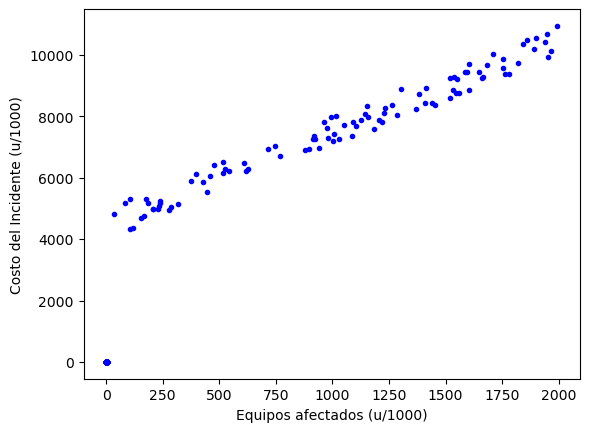

In [7]:
plt.plot(df['No_Equipos_Afectados'], df['Costo'], "b.")
plt.xlabel("Equipos afectados (u/1000)")
plt.ylabel("Costo del Incidente (u/1000)")
plt.show()

# 4.- Construcción del modelo

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
# Construcción del modelo y ajuste de la función de hípotesis
lin_reg = LinearRegression()
lin_reg.fit(df['No_Equipos_Afectados'].values.reshape(-1,1), df['Costo'].values)

LinearRegression()

In [10]:
# Parámetro Tetha 0
lin_reg.intercept_

np.float64(4504.2502713708855)

In [11]:
# Parámetro Tehta 1
lin_reg.coef_

array([2.9771679])

In [12]:
# Predicción para el valor mínimo y máximo para el conjunto de datos de entrenamiento

X_min_max = np.array([[df['No_Equipos_Afectados'].min()], [df['No_Equipos_Afectados'].max()]])
y_train_pred = lin_reg.predict(X_min_max)

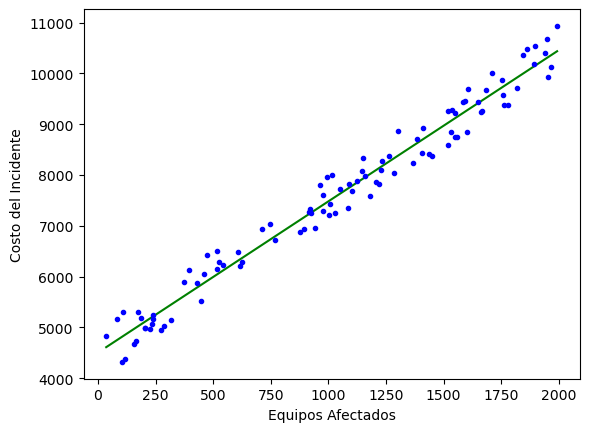

In [13]:
# Representación gráfica de la función de hípotesis generada.
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(df['No_Equipos_Afectados'], df['Costo'], "b.")
plt.xlabel("Equipos Afectados")
plt.ylabel("Costo del Incidente")
plt.show()

# 5.- Predicción de nuevos ejemplos

In [16]:
X_new = np.array([[1300]]) # Numero de equipos afectados.

# Prediccón del costo que tendría el incidente
Costo = lin_reg.predict(x_new)
print("El costo del incidente sería de: $", int(Costo[0]))

El costo del incidente sería de: $ 8374


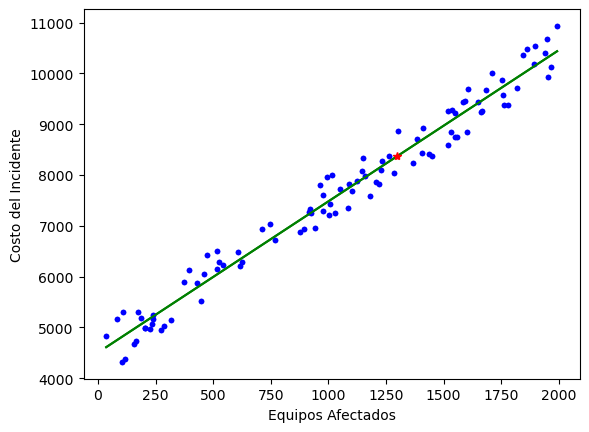

In [17]:
plt.plot(df['No_Equipos_Afectados'], df['Costo'], "b.")
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(X_new, Costo, "r*")
plt.xlabel("Equipos Afectados")
plt.ylabel("Costo del Incidente")
plt.show()